In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [21]:
data = pd.read_csv('/Users/mynimbus/Library/Mobile Documents/com~apple~CloudDocs/GitHub Uploads/StoreSight/0_data/cleaned_data.csv')

### Step 1: Distribution of Sales, Profit, and Total Order Value

In this section, we will analyze the distribution of key numerical features such as **Sales**, **Profit**, and **Total Order Value** to understand their spread, skewness, and any potential outliers.

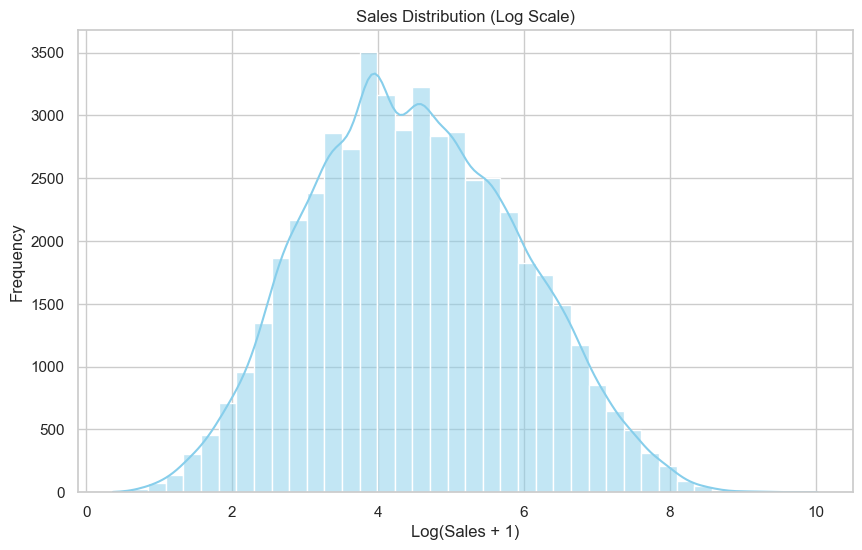

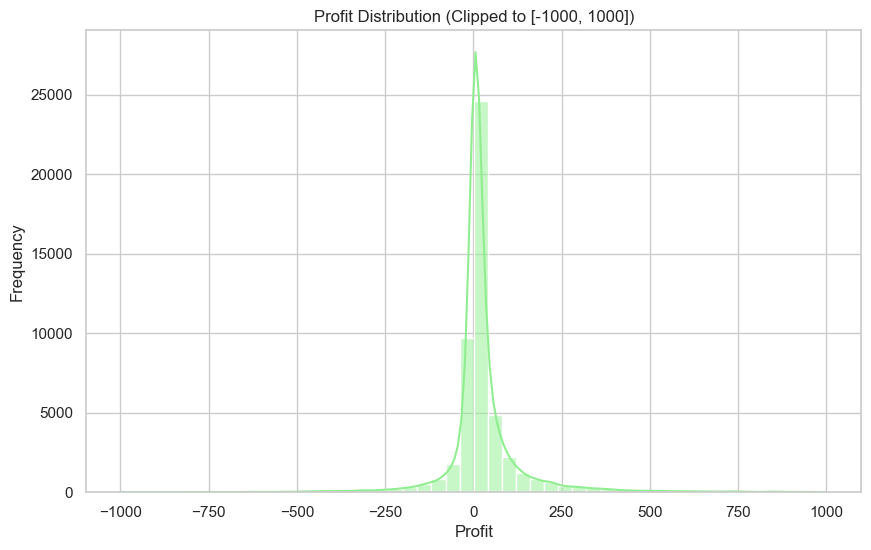

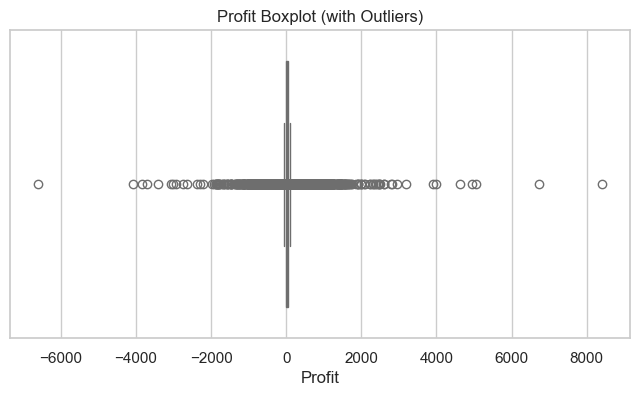

In [22]:

sns.set(style="whitegrid")

# Copy for safety
data_viz = data.copy()

# Avoid zero or negative values for log scaling
data_viz = data_viz[data_viz['Sales'] > 0]
data_viz = data_viz[data_viz['Profit'] != 0]

# 1. Sales Distribution - Log Scale
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(data_viz['Sales']), bins=40, kde=True, color='skyblue')
plt.title("Sales Distribution (Log Scale)")
plt.xlabel("Log(Sales + 1)")
plt.ylabel("Frequency")
plt.show()

# 2. Profit Distribution - Zoomed In
plt.figure(figsize=(10, 6))
sns.histplot(data_viz[(data_viz['Profit'] > -1000) & (data_viz['Profit'] < 1000)]['Profit'], 
             bins=50, kde=True, color='lightgreen')
plt.title("Profit Distribution (Clipped to [-1000, 1000])")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

# 3. Profit Box Plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=data_viz['Profit'], color='lightcoral')
plt.title("Profit Boxplot (with Outliers)")
plt.xlabel("Profit")
plt.show()

In [23]:
# Skewness & Kurtosis
from scipy.stats import skew, kurtosis

print(f"Sales Skewness: {skew(data_viz['Sales'])}")
print(f"Profit Skewness: {skew(data_viz['Profit'])}")
print(f"Profit Kurtosis: {kurtosis(data_viz['Profit'])}")

Sales Skewness: 8.147054017572628
Profit Skewness: 4.125711816907223
Profit Kurtosis: 287.7196135423113


### Step 2: Relationship Between Sales, Profit, and Total Order Value

This section will explore the relationships between **Sales**, **Profit**, and **Total Order Value**. We will visualize how sales correlate with profit and the overall total order value.

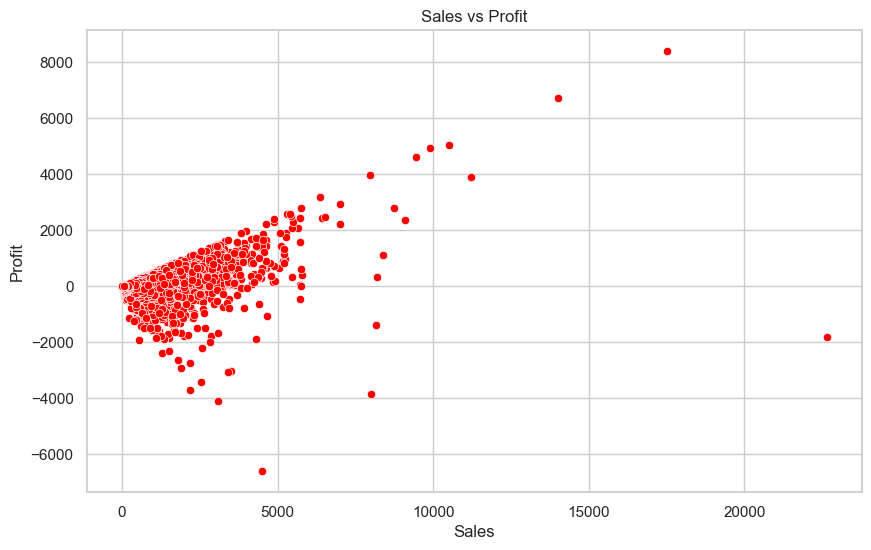

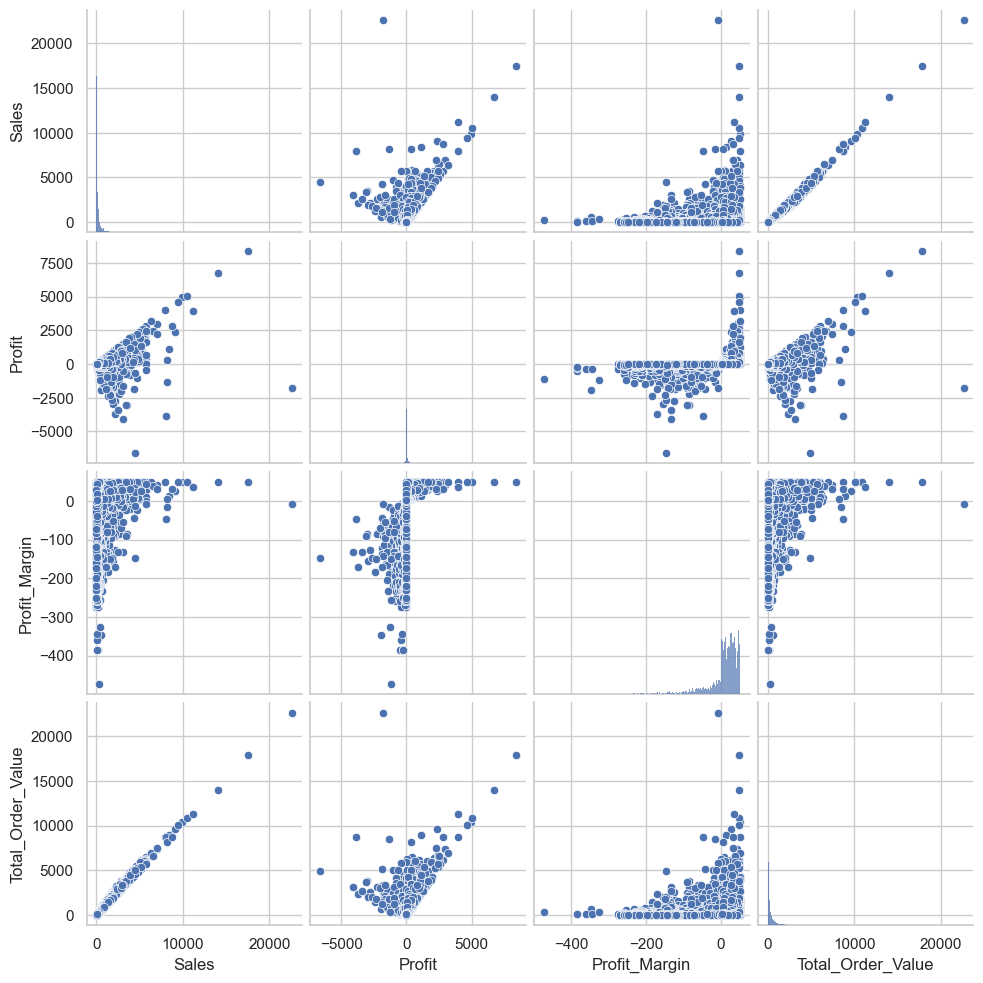

In [24]:
# Step 2: Relationship Between Sales, Profit, and Total Order Value

# 1. Scatter Plot of Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Sales'], y=data['Profit'], color="red")
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

# 2. Pairplot for key numerical features (Sales, Profit, Profit Margin, Total Order Value)
sns.pairplot(data[['Sales', 'Profit', 'Profit_Margin', 'Total_Order_Value']])
plt.show()

### Step 3: Profitability by Product Category and Subcategory

In this step, we will analyze profitability across different product categories and subcategories. This will help us understand which categories are more profitable.

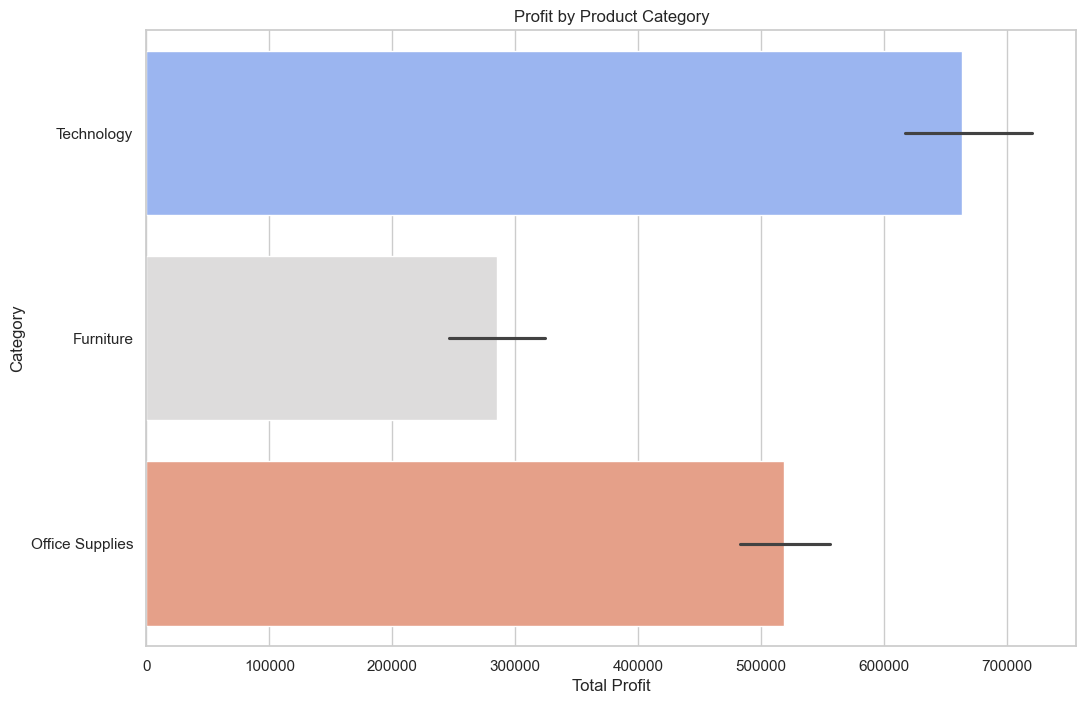

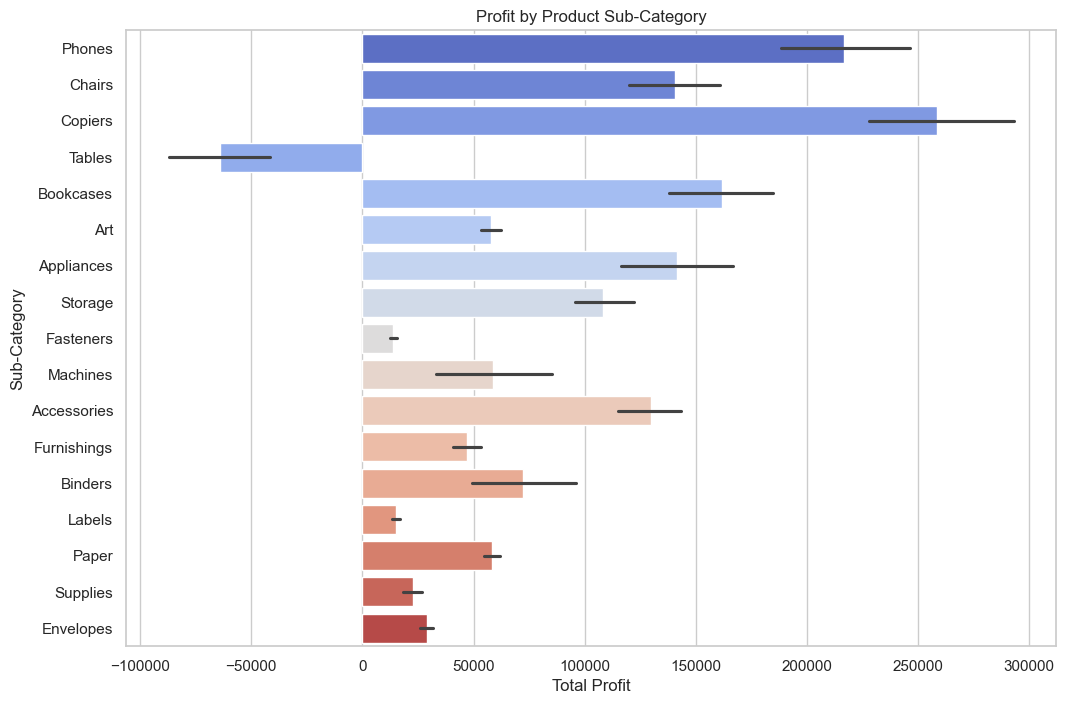

In [25]:
# Step 3: Profitability by Product Category and Subcategory

plt.figure(figsize=(12, 8))
sns.barplot(x='Profit', y='Category', data=data, estimator=sum, palette="coolwarm")
plt.title("Profit by Product Category")
plt.xlabel("Total Profit")
plt.ylabel("Category")
plt.show()

# Optionally: Subcategory-level profitability
plt.figure(figsize=(12, 8))
sns.barplot(x='Profit', y='Sub-Category', data=data, estimator=sum, palette="coolwarm")
plt.title("Profit by Product Sub-Category")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
plt.show()

### Step 4: Returns Analysis

In this section, we will visualize the return rates by product category, shipping mode, or other factors. This will give us an overview of how returns are distributed in the dataset.

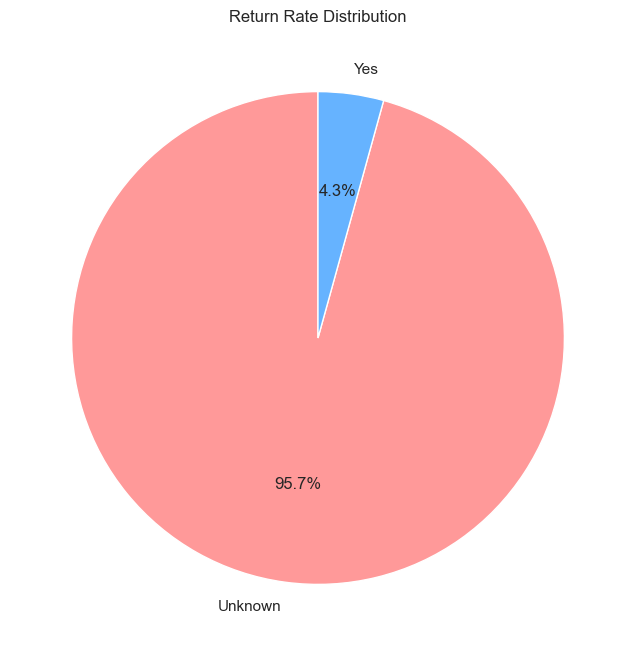

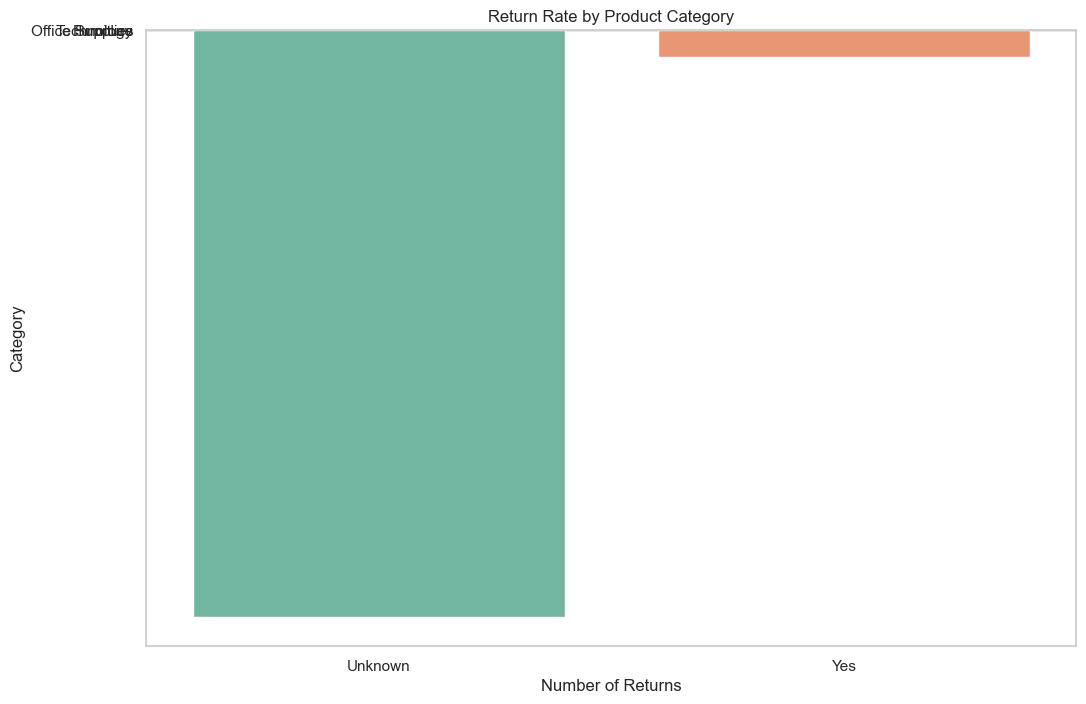

In [26]:
# Step 4: Returns Analysis

# Pie chart for return rate distribution
return_data = data['Returned'].value_counts(normalize=True)
return_data.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, figsize=(8,8))
plt.title("Return Rate Distribution")
plt.ylabel("")  # Remove ylabel for clarity
plt.show()

# Optionally: Return rate by category (Stacked bar plot)
plt.figure(figsize=(12, 8))
sns.barplot(x='Returned', y='Category', data=data, estimator=lambda x: len(x), palette="Set2")
plt.title("Return Rate by Product Category")
plt.xlabel("Number of Returns")
plt.ylabel("Category")
plt.show()

### Step 5: Time-Based Analysis

In this section, we will explore how sales, profit, and returns evolve over time. We will examine any trends and patterns by year, month, or other time-based features.

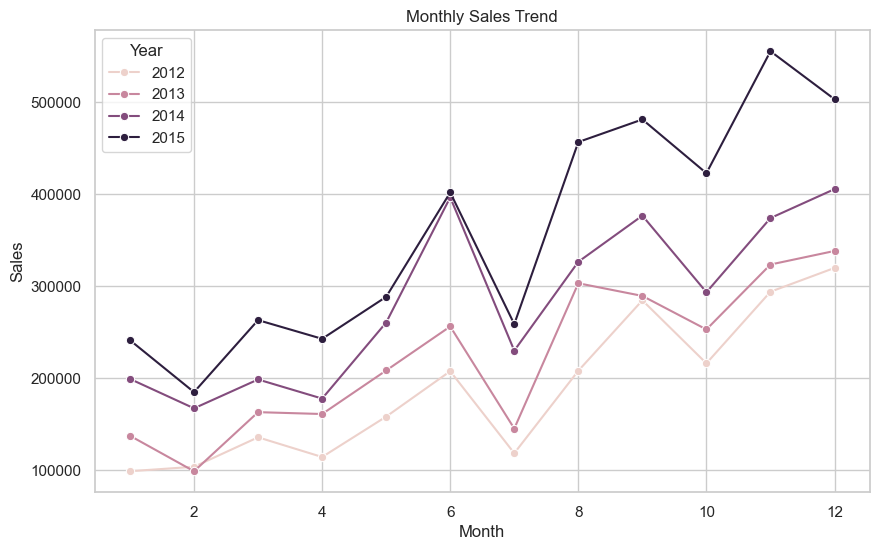

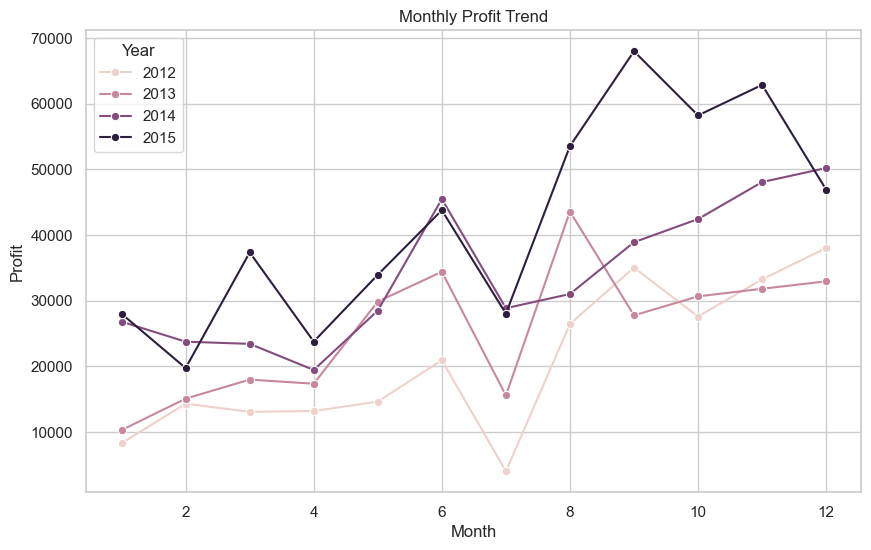

In [27]:
# Step 5: Time-Based Analysis (Optional)

# Convert 'Order Date' to datetime format
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

# Extract year and month for time-based analysis
data['Year'] = data['Order_Date'].dt.year
data['Month'] = data['Order_Date'].dt.month

# Sales trend over time (monthly)
plt.figure(figsize=(10, 6))
monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
sns.lineplot(x='Month', y='Sales', data=monthly_sales, hue='Year', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

# Profit trend over time (monthly)
plt.figure(figsize=(10, 6))
monthly_profit = data.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
sns.lineplot(x='Month', y='Profit', data=monthly_profit, hue='Year', marker='o')
plt.title("Monthly Profit Trend")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.show()

In [28]:
missing_data = data.isnull().sum()
missing_data_percentage = (missing_data / len(data)) * 100
print(f"Missing data percentage per column:\n{missing_data_percentage}")

Missing data percentage per column:
Unnamed: 0             0.0
Order_ID               0.0
Order_Date             0.0
Ship_Date              0.0
Ship_Mode              0.0
Customer_ID            0.0
Customer_Name          0.0
Segment                0.0
City                   0.0
State                  0.0
Country                0.0
Region                 0.0
Market                 0.0
Product_ID             0.0
Category               0.0
Sub-Category           0.0
Product_Name           0.0
Sales                  0.0
Quantity               0.0
Discount               0.0
Profit                 0.0
Shipping_Cost          0.0
Order_Priority         0.0
Returned               0.0
Shipping_Delay_Days    0.0
Profit_Margin          0.0
Total_Order_Value      0.0
Is_Returned            0.0
Year                   0.0
Month                  0.0
dtype: float64
